<a href="https://colab.research.google.com/github/Jmorgado125/ADA-Informes/blob/main/Copia_de_MergeSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**MergeSort**
![image](https://imgur.com/9SjgGWx.png)

##**1.Descripcion del Problema**

###1.1. Problema de ordenamiento de valores en una secuencia $A_n$ sin un orden definido , problema con resolucion en tiempo polinomial con algoritmos como el **MergeSort** que se guia por la filosofia de *Divide y venceras*.
>El paradigma **divide y vencerás** consiste en:
>
>1. **Dividir** el problema en varios subproblemas similares al problema original pero más pequeños.
>2. **Resolver** los subproblemas de manera **recursiva**, es decir, aplicando el mismo algoritmo a cada uno de ellos.
>3. **Combinar** las soluciones de todos los subproblemas y así obtener la solución del problema orignal.

Entrada:Valores de una secuencia de numeros no ordenados en arreglo.

Salida:Un arreglo con la secuencia de valores ordenados $[a_1< a_2 < a_3 ...a_n]$.

--------------------------------------------------------------------------------



##**2. Descripcion del Algoritmo**

###Implementacion del **Merge Sort.**

Su funcionamineto en pseudocódigo es el siguiente:

    MergeSort(A,p,r):
        q = int(p+r/2)
        Si p == r : return       
        MergeSort(A,p,q)         # Llamada recursiva para sub-arreglo izquierdo
        MergeSort(A,q+1,r)       # LLamada recursiva para sub-arrgelo derecho
        Merge(A,p,q,r)

###2.1 Implementacion funcion Merge.

Cada algoritmo recursivo depende de un caso base y de la capacidad de combinar los resultados de los casos base. La ordenación por MergeSort no es diferente. La parte más importante del algoritmo la cumple la funsion Merge encargada de fusionar los subarreglos.

**Implementacion funcion Merge**

In [31]:
def Merge(arr,L,R):
        i = j = k = 0 #Se definen variables para la fusion de los subarreglos (funcion Merge o de Mezcla)
        cont = 0

        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1
            cont +=1
 
        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1
 
        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1
            
        return arr,cont

*Accion de la funcion Merge*

![image](https://imgur.com/vXc0F3d.png)

**Implementacion algoritmo Merge Sort**

###**Merge Sort** en un algoritmo de ordenamiento se rije por la filosofia de *Divide y Venceras*, en el cual resuelve un arreglo de entrada sin un orden predeteminado, el arreglo (o lista) se divide inicialmente en dos mitades iguales y luego se combinan generando un nuevo arreglo ordenado secuencialmente $[a_1<,a_2<...a_n]$, este proceso se produce de manera recursiva segun el tamaño del arreglo y deternerse hasta que el arreglo sea indivisible $[a_n]$, es decir, cuando este vacio o existe solo un elemento.
###Finalmente cuando esten todos los subarreglos indivisibles se aplica la funcion Merge encargada de fusionar y ordenar los subarreglos.

--------------------------------------------------------------------------------

In [32]:
def Merge_Sort(arr):
    if len(arr) > 1:
        mid = len(arr)//2
        #Inicialmente se definen las dos primeras mitades del arreglo 
        L = arr[:mid]
        R = arr[mid:]
        #Observamos que el algoritmo se llama recursivamente dos veces. Esto implica que la ejecución puede graficarse como un árbol binario.
        Merge_Sort(L)
        Merge_Sort(R)
        #La función Merge básicamente se encarga de generar un arreglo ordenado a partir de dos sub-arreglos ordenados
        arr,cont=Merge(arr,L,R)
        return arr,cont






if __name__ == '__main__':
    print("FUNCION MERGE SORT")
    print("")
    print("--------------------------------------------")
    arr = [1,4,6,2,3,44,34,23,45,78,54,33]
    print("Entrada:",arr)
    A,cont=Merge_Sort(arr)
    print("Salida:",arr)
    print("Numero de Comparaciones =",cont)
    print("--------------------------------------------")
    arr2 = [1,2,3,4,5,6,7,8,3,12, 11, 13, 5, 6, 7]
    print("Entrada:",arr2)
    A,cont=Merge_Sort(arr2)
    print("Salida:",A)
    print("Numero de Comparaciones =",cont)
    print("--------------------------------------------")



FUNCION MERGE SORT

--------------------------------------------
Entrada: [1, 4, 6, 2, 3, 44, 34, 23, 45, 78, 54, 33]
Salida: [1, 2, 3, 4, 6, 23, 33, 34, 44, 45, 54, 78]
Numero de Comparaciones = 9
--------------------------------------------
Entrada: [1, 2, 3, 4, 5, 6, 7, 8, 3, 12, 11, 13, 5, 6, 7]
Salida: [1, 2, 3, 3, 4, 5, 5, 6, 6, 7, 7, 8, 11, 12, 13]
Numero de Comparaciones = 11
--------------------------------------------


##**2.2 Ejemplificacion Paso a paso**

##![image](https://imgur.com/J4oIjy0.png)

##Explicacion del ejemplo de lo que seucede paso a paso.



> 1. Primeramente el algoritmo recibe un arreglo de un tamaño de 3, el cual inicialmente lo  divide en 2 mitades, resultando dos subarreglos (con un tamaño menor a 3). 
>
>2. En la segunda secuencia observamos que hay un arrelgo que sigue siendo divisible ,por lo que el algoritmo recursivamente lo vuelve a dividir en subarreglos.
>
>3. En el tercer paso vemos que el resultado de todas las divisiones dejo a 3 arreglos indivisibles e independientes por lo que se da inicio a la utilizacion de la funcion **Merge** encargada de fusionar en orden los subarreglos en un arreglo.
>
>4. El el cuarto paso del ejemplo observamos que ocurre la primera fusion de arreglo que se encuentra ordenado $[8,20]$ y este se mezclara en orden con el otro arreglo.
>
>5. Finalmente observamos que el arreglo final esta completamente ordenado con los mismo elementos de entrada

--------------------------------------------------------------------------------


##**3. Tiempo de ejecucion**


#### **Teorema (Tiempo de ejecución)**.


![image](https://imgur.com/znzAdJz.png)

La complejidad temporal de **Merge Sort** es θ(nLogn) en los 3 casos *(peor, promedio y mejor)* ya que merge sort siempre divide la entrada en dos mitades y toma un tiempo lineal para fusionar dos mitades.

Merge Sort es un algoritmo recursivo y la complejidad del tiempo se puede expresar como la siguiente relación de recurrencia.



>
>
>$T(n) =\begin{cases}
  O(1)  & n = 1 \\
  2 T(n/2) + O(n) + O(1) & \text{ otherwise}
\end{cases}$
>
>la cual se puede simplificar a
>
>$T(n) = \begin{cases}
  O(1)  & n = 1 \\
  2 T(n/2) + O(n) & \text{ otherwise}
\end{cases}$
>
>*La recurrencia anterior se puede resolver utilizando el método del árbol de recurrencia o el método maestro.*



--------------------------------------------------------------------------------

##**4.Correctitud** 

### **Correctitud Funcion Merge**

Merge recibe dos subarreglos ordenados $[A_1]$ y $[A_2]$, retornando al finalizar un arreglo $B$ que contiene todos los elementos de $A_1 \cup A_2$ de forma ordenada.

***Propiedad invariable de bucle para Merge:***
Para cada iteración dentro de la función *Merge*, los arreglos $B$, $A_1$, y $A_2$ se encuentran siempre ordenados, siendo los valores en $A_1$ y $A_2$ menores a los que se encuentran en $B$.

![image](https://imgur.com/zbygFic.png)

### **Inicialización:**
Antes de iniciar la primera iteración, se cumple con ambas condiciones

1. Al estar $B$ vacío y asumiendo que $A_1$ y $A_2$ se encuentran ordenados al entrar a la función, se concluye que los tres arreglos se encuentran ordenados al inicio del bucle.

2. Nuevamente, al encontrarse $B$ vacío todos los valores de $A_1 \cup A_2$ son trivialmente mayores.

### **Mantención:**
Para cualquier iteración $i$ del bucle, se comparará y se eliminará el elemento más pequeño de $A_1 \cup A_2$, insertándose en $B$. Esto mantiene la idea de que $B$ siempre contendrá elementos menores a aquellos en  $A_1 \cup A_2$. 

Además, al realizarse las comparaciones en arreglos ordenados, se verifica que el elemento $B[i+1]$ va a ser mayor que $B[i]$, pues será el $i+1$-ésimo más pequeño del conjunto $A_1 \cup A_2$, manteniendo el orden propuesto.



### **Correctitud**
Como la propiedad se mantiene al inicio y final de la  i-ésima iteración, se puede concluir que cuando se termine de realizar la última iteración del bloque el arreglo $B$ contendrá la totalidad de sus valores ordenados del conjunto $A_1 \cup A_2$. 











### **Correctitud para MergeSort**
####  *(Lema) *MergeSort* recibe un arreglo $A$ de $n$ elementos, retornando el arreglo ordenado de forma que $a_1 ≤ a_2 ≤... a_n$*

#### ***Caso base***
Para el caso base $n=1$, se cumple la declaración pues al ser un elemento único se encuentra trivialmente ordenado.

#### ***Caso General***
Para un arreglo de $n$ elementos, al realizar la llamada de MergeSort y dividir el problema  de forma recursiva, se llegará a sub-arreglos de $A$ idivisibles *($len=1$)*. 

Según el Teorema anterior, *Merge* siempre retornará arreglos ordenados a partir de los sub-arreglos entregados como parámetros, por lo que se puede concluir que al finalizar cualquier llamada de MergeSort, para un $m < n$ , tendremos un arreglo ordenado. 

Por lo tanto *MergeSort* es correcto





 

--------------------------------------------------------------------------------

##**5.Experimentacion**



--------------------------------------------------------------------------------

A continuación se muestra gráficamente la complejidad temporal que sucede en la implementacion del algoritmo.

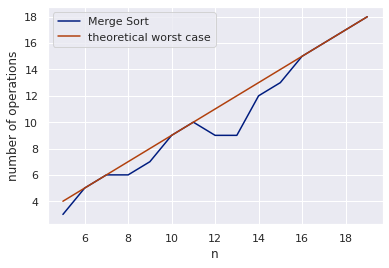

In [54]:
import random
import matplotlib.pyplot as plt

x=[n for n in range(5,20)] 
y2=[n-1 for n in range(5,20)] # Caso general
y=[]; 

for n in range(5,20):
  a = random.sample(range(1, 1000), n)
  a,counter = Merge_Sort(a)
  y.append(counter)

plt.plot(x,y)
plt.plot(x,y2)
plt.legend(["Merge Sort", "theoretical worst case", "theoretical best case"])

plt.xlabel('n')
plt.ylabel('number of operations')
plt.show()

observamos que temporalmente el algoritmo no varia segun su orden de entrada por lo que tecnicamente no existe un caso peor o mejor, debido a su manera de operar.